### This notebook examines tranimate with the Robotics Toolbox (RTB) for Python - Update1. ###



In [1]:
# Robotics Toolbox for Python
# Copyright (C) 1993-2013, by Peter I. Corke
#
# This file is part of The Robotics Toolbox for MATLAB (RTB).
# 
# RTB is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License
# as published by the Free Software Foundation, either version
# 3 of the License, or (at your option) any later version.
# 
# RTB is distributed in the hope that it will be useful, but
# WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See
# the GNU Lesser General Public License for more details.
# 
# You should have received a copy of the GNU Lesser General
# Public License along with RTB. If not, copies may be viewed
# and downloaded at <https://www.gnu.org/licenses/>.
#
# http://www.petercorke.com

# This file contains scripting elements extracted from RTB for
# MATLAB v9.8 rvctools/robot/demos/traj.m script to illustrate
# the creation and plotting of frame transform sequences.

In [2]:
""" Matplotlib imports
"""
import matplotlib
matplotlib.use('TkAgg')
%matplotlib notebook
import matplotlib.pyplot as plt  # needed to get current figure number using plt.gcf().number
from matplotlib import rc        # needed to set Matplotlib animation._repr_html_()

rc('animation', html='jshtml')   # Matplotlib animations will be HTML wrapped JavaScript

In [3]:
""" RBT for Python robot imports
"""
import _robot                   # use helper script to locate local RTB for Python robot module
from robot.plot import *        # needed to access robot plot module globals (i.e., trplotAnims2D)
from robot.transform import *   # needed for transl(), trotx(), troty() & trotz() function
from robot.trajectory import *  # needed for ctraj() function

Using Robotics Toolbox module /home/garyd/PycharmProjects/robotics-toolbox-python/notebooks/tranimate3d/../../robot


In [4]:
# We may wish to interpolate between poses. We will define an 
# initial and final pose as homogeneous transforms T0 and T1
# respectively,
T0 = transl(0.4, 0.2, 0.0) * trotx(pi)
T1 = transl(-0.4, -0.2, 0.3) * troty(pi/2) * trotz(-pi/2)


In [5]:
# and apply the ctraj() function to create the smooth sequence
# T between them in 50 steps as:
T = ctraj(T0, T1, 50)

print("The first pose transform is:")
print(T[0])
print("The tenth pose transform is:")
print(T[9])

The first pose transform is:
[[ 1.   0.   0.   0.4]
 [ 0.  -1.   0.   0.2]
 [ 0.   0.  -1.   0. ]
 [ 0.   0.   0.   1. ]]
The tenth pose transform is:
[[ 0.96658474  0.19720093 -0.16378566  0.3392753 ]
 [ 0.16378566 -0.96658474 -0.19720093  0.16963765]
 [-0.19720093  0.16378566 -0.96658474  0.02277176]
 [ 0.          0.          0.          1.        ]]


<IPython.core.display.Javascript object>


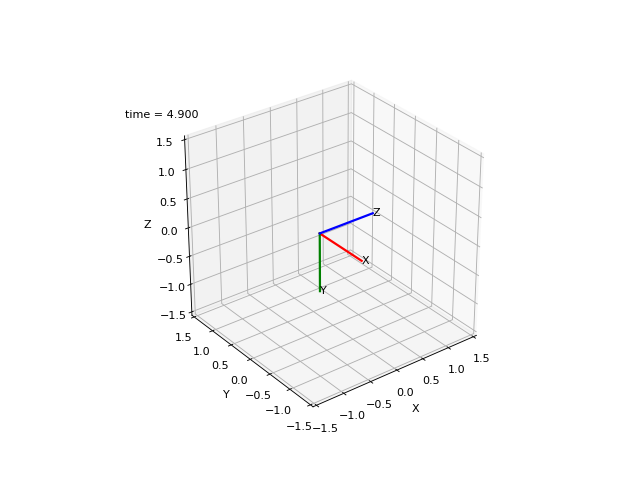

fignum = 1


In [6]:
# We can plot and record the motion of an XYZ Cartesian coordinate
# frame by using the tranimate() function.
axlims = [-1.5, 1.5, -1.5, 1.5, -1.5, 1.5]
tranimate(T, None, rec=0, movie="./images", axis=axlims)

# tranimate() creates a Matplotlib animation 3D object and saves a handle to it
# in the trplotAnims3D dictionary using the animator's managed figure number as
# keyword.
fignum = plt.gcf().number                   
print("fignum = %d" % fignum)

In [7]:
# Display the RTB for Python rbplot() animation of the Puma 560 as a controlled animation.
trplotAnims3D[fignum]

Run the same case using the RTB for MATLAB Octave variant to create and save frame
transform animation movie for comparison with RTB for Python. The octave_tranim3d.m
script will create movie file RTB_tranimate.avi in the ./images/Octave subdirectory.

The Octave process will block after displaying the "RTB-tranimate - Recorded Frames'
figure while awaiting left or right mouse button clicks on the figure's axis area. 
Left button clicks will replay the recorded animation and a right button click will
close both figures and terminate the Octave process.

In [10]:
import os.path
if os.path.isfile("/usr/bin/octave"):
    # show instructions for the 'RTB-tranimate' figure
    print("On the 'RTB-tranimate - Recorded Frames' figure, use mouse buttons:")
    print("  + left to replay the movie")
    print("  + right to close both figures\n")
    # create and invoke subprocess to execute Octave on octave_tranim3d.m script
    from subprocess import Popen
    pargs =['/usr/bin/octave', '--no-gui', './octave_tranim3d.m']
    p = Popen(pargs, bufsize=-1, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    (stdoutdata, stderrdata) = p.communicate()
    p.wait()
    # show Octave output with instructions for the 'RTB-tranimate' figure stripped.
    lines = stdoutdata.decode("utf-8").split('\n')
    for line in lines:
        if not ( (line[0:len("On the ")] == "On the ") or \
                 (line[0:len("  + ")] == "  + ")          ):
            print("%s" % (line))

On the 'RTB-tranimate - Recorded Frames' figure, use mouse buttons:
  + left to replay the movie
  + right to close both figures

The first pose transform is:
   1.00000   0.00000   0.00000   0.40000
   0.00000  -1.00000   0.00000   0.20000
   0.00000   0.00000  -1.00000   0.00000
   0.00000   0.00000   0.00000   1.00000
The tenth pose transform is:
   0.96658   0.19720  -0.16379   0.33928
   0.16379  -0.96658  -0.19720   0.16964
  -0.19720   0.16379  -0.96658   0.02277
   0.00000   0.00000   0.00000   1.00000
Recorded movie frames saved as file ./images/Octave/RTB_tranimate.avi



In [11]:
# Use ffplay to display the frame transform animation movie created by RTB for MATLAB
# Octave variant.
if os.path.isfile("./images/Octave/RTB_tranimate.avi"):
    subp = playmovie("./images/Octave/RTB_tranimate.avi")
    print("subprocess pid = %s" % subp.pid)

ffplay: use '<-' arrow key to replay, 'P' key to
        pause/resume, 'S' key to single step and
        'Q' or 'ESC' key to quit.
subprocess pid = 24341
